<a href="https://colab.research.google.com/github/khanh22mse23057/Semester2-DIP/blob/main/%5BDigital_Image_and_Video_Processing%5D_Team04_Homework02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Load the Dependencies

> This section loads some required libraries used in this notebook: **numpy**, **pandas**, **cv2**, **skimage**, **PIL**, **matplotlib**

*   [Numpy](https://www.numpy.org/) is an array manipulation library, used for linear algebra, Fourier transform, and random number capabilities.
*   [Pandas](https://pandas.pydata.org/) is a library for data manipulation and data analysis.
*   [CV2](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_image_display/py_image_display.html) is a library for computer vision tasks.
*   [Matplotlib](https://matplotlib.org/) is a library which generates figures and provides graphical user interface toolkit.

In [1]:
import numpy as np
import pandas as pd
import cv2 
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

import urllib as URL
import requests
from io import BytesIO
from PIL import Image

%matplotlib inline

### Utilities

In [2]:
def im2double(imgPath, flag = 1):
   img = cv2.imread(imgPath, flag)
   if img is not None:
      img = img.astype(np.float32) # Divide all values by the largest possible value in the datatype
   return img 

In [3]:
def imshow(title, image):
  print(title)
  cv2_imshow(image)

# Check Image Information
def image_infor(image):
  # Check the image matrix data type (could know the bit depth of the image)
  print(image.dtype)
  # Check the height of image 
  print(image.shape[0])
  # Check the width of image 
  print(image.shape[1])
  # Check the number of channels of the image
  print(image.shape[2])


### Download input images

In [4]:
input_images = ['https://i.ibb.co/sJMRHdK/traces.png',
'https://i.ibb.co/j8n8xDT/portrait.jpg',
'https://i.ibb.co/NxsK30H/objects.png',
'https://i.ibb.co/7XWtfv7/fence.jpg',
'https://i.ibb.co/GC9TLh4/coins.png',
'https://i.ibb.co/VSsW5sx/circles.png',
'https://i.ibb.co/g9RTd5H/butterfly.png',
'https://i.ibb.co/gyXj2HR/bike.png']


In [5]:
for url in input_images:
  !wget -P images -q {url}
!ls images

bike.png	 circles.png	fence.jpg      portrait.jpg
bike.png.1	 circles.png.1	fence.jpg.1    portrait.jpg.1
butterfly.png	 coins.png	objects.png    traces.png
butterfly.png.1  coins.png.1	objects.png.1  traces.png.1


In [6]:
# image = cv2.imread('./images/coins.png')
#image = im2double('./images/coins.png')

# Scale the image
# scaled_image = cv2.resize(image, None, fx=0.4, fy=0.4, interpolation=cv2.INTER_LINEAR)
# cv2_imshow(scaled_image)

# Homework 02

In [7]:
# grayImg  = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
# cv2_imshow(grayImg)

# # Calculate the threshold using Otsu's method
# thresh, img_bw = cv2.threshold(grayImg, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# cv2_imshow(img_bw)

## L8_1 Binary Dilation

MATLAB CODE

In [8]:
# %L8_1 Binary Dilation
# clear, clc, close all;

# %load image
# Img = imread('traces.png');

# %perform dilation with different structuring element (SE)
# %a. Small disk with radius = 10
# se1 = strel('disk', 10, 0);
# BW1 = imdilate(Img, se1);
# %b. Large disk with radius = 25
# se2 = strel('disk', 25, 0);
# BW2 = imdilate(Img, se2);

# %show and save images
# subplot(1, 3, 1), imshow(Img), title('Original Image');
# subplot(1, 3, 2), imshow(BW1), title('Dilation by Small Disk');
# subplot(1, 3, 3), imshow(BW2), title('Dilation by Large Disk');
# imwrite(BW1, 'Dilation_Disk_10.png');
# imwrite(BW2, 'Dilation_Disk_25.png');

PYTHON CODE

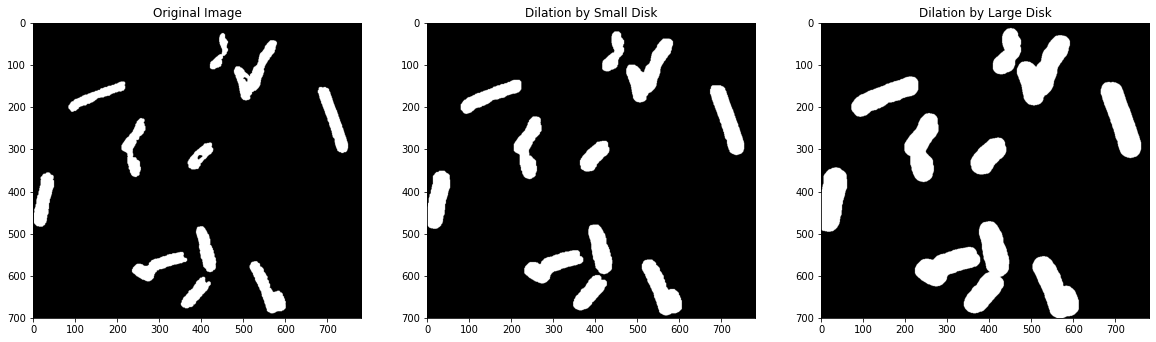

True

In [9]:
# Author: Nguyen Huu Nguyen
# %load image
Img = cv2.imread('./images/traces.png')
# %perform dilation with different structuring element (SE)
# %a. Small disk with radius = 10
se1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10, 10))
BW1 = cv2.dilate(Img, se1, iterations = 1)
# %b. Large disk with radius = 25
se2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (25, 25))
BW2 = cv2.dilate(Img, se2, iterations = 1)
# %show images
fig, axs = plt.subplots(1, 3, figsize=(20, 10))

axs[0].imshow(Img, cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(BW1, cmap='gray')
axs[1].set_title('Dilation by Small Disk')
axs[2].imshow(BW2, cmap='gray')
axs[2].set_title('Dilation by Large Disk')
plt.show()

# Turn off axis for all subplots
for ax in axs.flat:
    ax.axis('off')

# Save images
cv2.imwrite('Dilation_Disk_10.png', BW1)
cv2.imwrite('Dilation_Disk_25.png', BW2)

## L8_2 Binary Erosion

MATLAB CODE

In [10]:
# %L8_2 Binary Erosion
# clear, clc, close all;

# %load image
# Img = imread('traces.png');

# %perform dilation with different structuring element (SE)
# %a. Small square with edge = 5
# se1 = strel('square', 5);
# BW1 = imerode(Img, se1);
# %b. Large square with edge = 10
# se2 = strel('square', 10);
# BW2 = imerode(Img, se2);

# %show and save images
# subplot(1, 3, 1), imshow(Img), title('Original Image');
# subplot(1, 3, 2), imshow(BW1), title('Erosion by Small Square');
# subplot(1, 3, 3), imshow(BW2), title('Erosion by Large Square');
# imwrite(BW1, 'Erosion_Square_5.png');
# imwrite(BW2, 'Erosion_Square_10.png');

PYTHON CODE

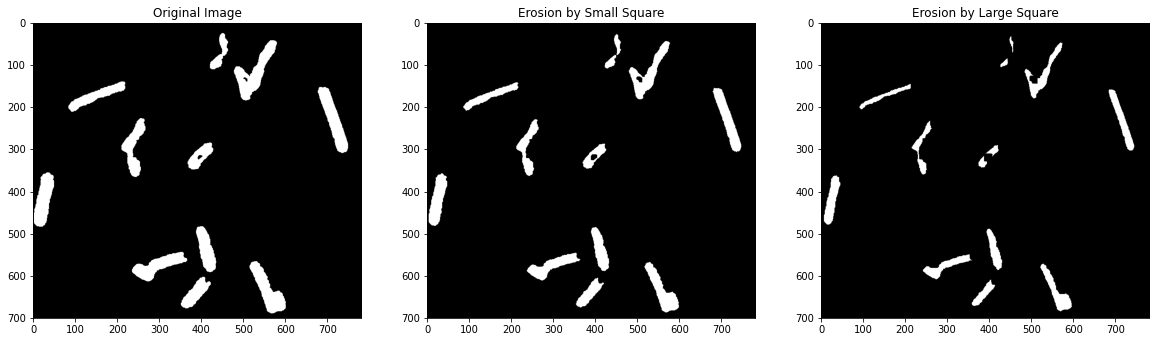

True

In [11]:
# Author: Nguyen Bao Nguyen

# load image
Img = cv2.imread('./images/traces.png')

# perform erosion with different structuring element (SE)
#a. Small square with edge = 5
se1 = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
BW1 = cv2.erode(Img, se1)
#b. Large square with edge = 10
se2 = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 10))
BW2 = cv2.erode(Img, se2)

# show and save images
# imshow('Original Image', Img)
# imshow('Erosion by Small Square', BW1)
# imshow('Erosion by Large Square', BW2)

# Show images
fig, axs = plt.subplots(1, 3, figsize=(20, 10))

axs[0].imshow(Img, cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(BW1, cmap='gray')
axs[1].set_title('Erosion by Small Square')
axs[2].imshow(BW2, cmap='gray')
axs[2].set_title('Erosion by Large Square')
plt.show()

# Turn off axis for all subplots
for ax in axs.flat:
    ax.axis('off')

# Save images
cv2.imwrite('Erosion_Square_5.png', BW1)
cv2.imwrite('Erosion_Square_10.png', BW2)


## L8_3 Binary Erosion with Coins

MATLAB CODE

In [12]:
# %L8_3 Binary Erosion with Coins
# clear, clc, close all;

# %load image
# Img = imread('circles.png');

# %perform erosion with square with edge = 30
# se1 = strel('square', 30);
# BW1 = imerode(Img, se1);
# %perform erosion with disk with radius = 30
# se2 = strel('disk', 30, 0);
# BW2 = imerode(Img, se2);
# %perform erosion with rectangle with dimensions = [15 30]
# se3 = strel('rectangle', [15 30]);
# BW3 = imerode(Img, se3);
# %perform erosion with diamond with radius = 30
# se4 = strel('diamond', 30);
# BW4 = imerode(Img, se4);
# %perform erosion with line with length = 30 and degree = 45
# se5 = strel('line', 30, 45);
# BW5 = imerode(Img, se5);

# %show and save images
# figure(1), clf;
# subplot(2, 3, 1), imshow(Img), title('Original Image');
# subplot(2, 3, 2), imshow(BW1), title('Eroded by Square');
# subplot(2, 3, 3), imshow(BW2), title('Eroded by Disk');
# subplot(2, 3, 4), imshow(BW3), title('Eroded by Rectangle');
# subplot(2, 3, 5), imshow(BW4), title('Eroded by Diamond');
# subplot(2, 3, 6), imshow(BW5), title('Eroded by Line');

# imwrite(BW1, 'Binary_Erosion_Coins_Square.jpg');
# imwrite(BW2, 'Binary_Erosion_Coins_Disk.jpg');
# imwrite(BW3, 'Binary_Erosion_Coins_Rectangle.jpg');
# imwrite(BW4, 'Binary_Erosion_Coins_Diamond.jpg');
# imwrite(BW5, 'Binary_Erosion_Coins_Line.jpg');

PYTHON CODE

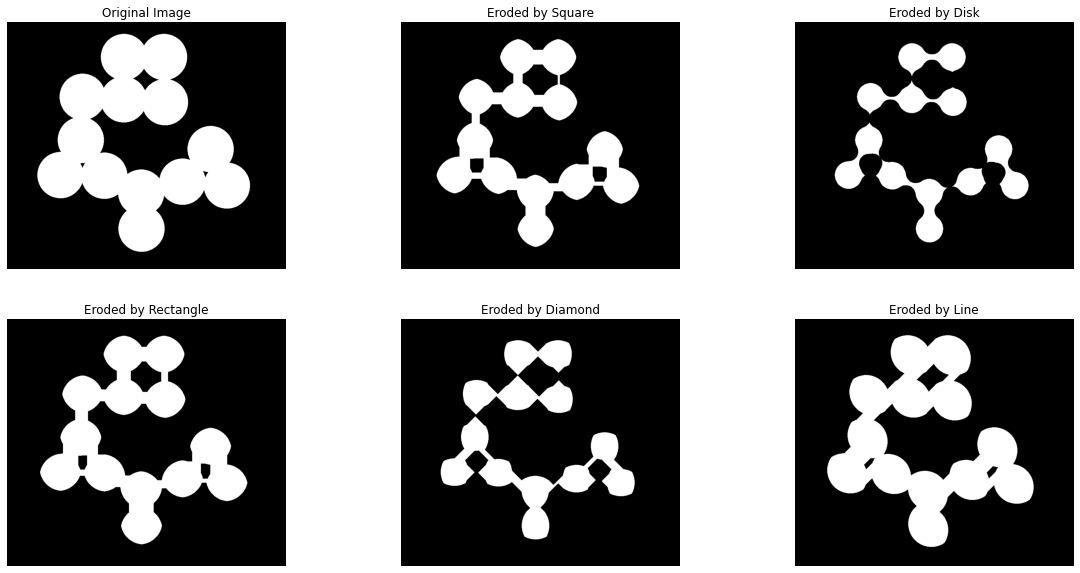

True

In [14]:
# Author: Pham Nguyen Phu Khanh

# load image
Img = cv2.imread('./images/circles.png')
r = 30

# Perform erosion with square with edge = 30
se1 = cv2.getStructuringElement(cv2.MORPH_RECT, (r, r))

# Perform erosion with disk with radius = 30
se2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2*r + 1,  2*r + 1), (r, r))

# Perform erosion with rectangle with dimensions = [15 30]
se3 = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 30))

# Perform erosion with diamond with radius = 30
se4 = cv2.getStructuringElement(cv2.MORPH_RECT, (2*r+1, 2*r+1))
for i in range(r+1):
    for j in range(r+1):
        if i+j > r:
            se4[r-i, r-j] = 0
            se4[r+i, r+j] = 0
            se4[r-i, r+j] = 0
            se4[r+i, r-j] = 0

# Perform erosion with line with length = 30 and degree = 45
# create the linear structuring element with length=30 and angle=45 degrees
angle = 45
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (r,1))
se5 = cv2.warpAffine(kernel, cv2.getRotationMatrix2D((r,0), angle, 1.0), (r,r))

# Perform erosion with each structuring element
bw1 = cv2.erode(Img, se1)
bw2 = cv2.erode(Img, se2)
bw3 = cv2.erode(Img, se3)
bw4 = cv2.erode(Img, se4)
bw5 = cv2.erode(Img, se5)

fig, axs = plt.subplots(2, 3, figsize=(20, 10))
# Show the first image in the first subplot
axs[0, 0].imshow(Img)
axs[0, 0].set_title('Original Image')
axs[0, 1].imshow(bw1)
axs[0, 1].set_title('Eroded by Square')
axs[0, 2].imshow(bw2)
axs[0, 2].set_title('Eroded by Disk')

# Show the second image in the fourth subplot
axs[1, 0].imshow(bw3)
axs[1, 0].set_title('Eroded by Rectangle')
axs[1, 1].imshow(bw4)
axs[1, 1].set_title('Eroded by Diamond')
axs[1, 2].imshow(bw5)
axs[1, 2].set_title('Eroded by Line')

# Turn off axis for all subplots
for ax in axs.flat:
    ax.axis('off')

# Show the plot
plt.show()

# Save images to disk
cv2.imwrite('Binary_Erosion_Coins_Square.jpg', bw1)
cv2.imwrite('Binary_Erosion_Coins_Disk.jpg', bw2)
cv2.imwrite('Binary_Erosion_Coins_Rectangle.jpg', bw3)
cv2.imwrite('Binary_Erosion_Coins_Diamond.jpg', bw4)
cv2.imwrite('Binary_Erosion_Coins_Line.jpg', bw5)

## L8_4 Hole Detection in a Fence

MATLAB CODE

In [15]:
# %L8_4 Hole Detection in a Fence
# clear, clc, close all;

# %load image
# Img = imread('fence.jpg');
# Img = rgb2gray(Img);
# ImgSize = size(Img);
# level = graythresh(Img);
# BW = im2bw(Img, level);

# %perform erosion with a cross struturing element
# length = 101;
# NHOOD = zeros(length);
# NHOOD(ceil(length/2), :) = 1;
# NHOOD(:, ceil(length/2)) = 1;
# se = strel('arbitrary', NHOOD);
# BW1 = imerode(BW, se);

# %show and save images
# figure(1), clf;
# imshow(NHOOD);

# figure(2), clf;
# subplot(1, 3, 1), imshow(Img), title('Original Image');
# subplot(1, 3, 2), imshow(BW), title('Binary Image');
# subplot(1, 3, 3), imshow(BW1), title('Eroded Image');

# imwrite(BW, 'Binary_Erosion_Fence_BW.jpg');
# imwrite(BW1, 'Binary_Erosion_Fence_Hole_Detection.jpg');

PYTHON CODE

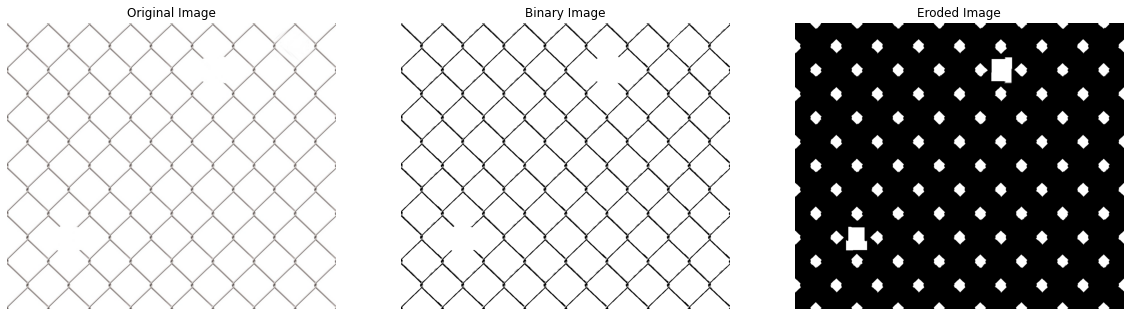

In [16]:
# Author: Nguyen Viet Khang
# load image
img = cv2.imread('./images/fence.jpg')
# convert image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# threshold the image to convert it into binary
threshold_value, binary_img = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# define a cross-shaped structuring element for erosion
length = 101
nhood = np.zeros((length, length))
nhood[int(length/2), :] = 1
nhood[:, int(length/2)] = 1
h = np.ones(nhood.shape)
se = cv2.getStructuringElement(cv2.MORPH_CROSS, (length, length), (int(length/2), int(length/2)))

# perform erosion with a cross-shaped structuring element
eroded_img = cv2.erode(binary_img, se)

# Show images
fig, axs = plt.subplots(1, 3, figsize=(20, 10))
axs[0].imshow(img)
axs[0].set_title('Original Image')
axs[0].axis('off')
axs[1].imshow(cv2.bitwise_not(binary_img), cmap='binary')
axs[1].set_title('Binary Image')
axs[1].axis('off')
axs[2].imshow(cv2.bitwise_not(eroded_img), cmap='binary')
axs[2].set_title('Eroded Image')
axs[2].axis('off')
plt.show()